In [2]:
!pip install pandas spacy networkx matplotlib



     --------------------------------------- 12.1/12.1 MB 38.4 MB/s eta 0:00:00
     -------------------------------------- 122.3/122.3 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 47.4 MB/s eta 0:00:00
     ------------------------------------- 479.7/479.7 kB 29.3 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB ? eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 57.0/57.0 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ---------------------------------------- 181.6/181.6 kB ? eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 42.0 MB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.9 MB/s eta 0:00:00
     ------------------------------------- 268.9/268.9 kB 17.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


SENTIMENT ANALYSIS

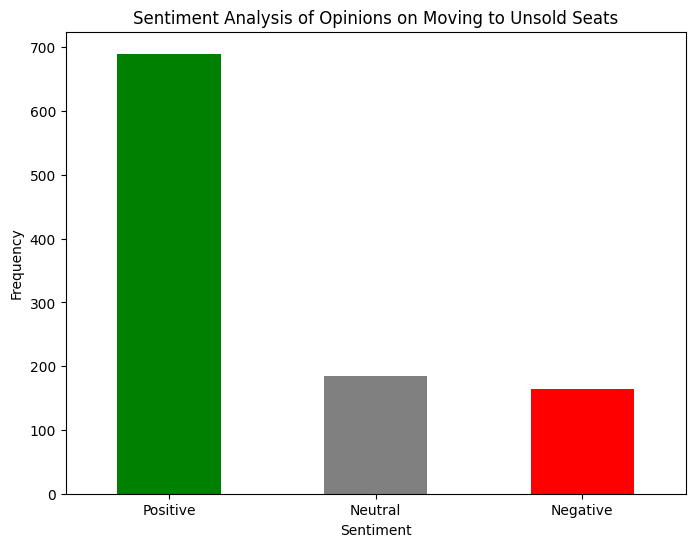

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('preprocessed_flying_etiquette.csv')

# Function to calculate sentiment polarity
def sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis on a suitable column
df['sentiment_polarity'] = df['Is itrude to move to an unsold seat on a plane?'].fillna('').apply(sentiment_polarity)

# Categorizing sentiments into Positive, Neutral, and Negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_sentiment)

# Counting the number of instances in each category
sentiment_counts = df['sentiment_category'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

# Visualizing sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Analysis of Opinions on Moving to Unsold Seats')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keeps the labels on the x-axis upright
plt.grid(False)
plt.show()
